In [2]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import pandas as pd

In [3]:
df=pd.read_csv("Textiles.csv")

In [4]:
df

,PartnerCountry,PartnerContinent,DevelopmentStatus,AvgExports,MaxExports,AvgGrowth,YrsPositiveGrowth
0,Argentina,South America,Emerging,70630.67,109285.39,19.1779,6
1,Belgium,Europe,Developed,464622.74,640258.03,9.2133,6
2,Brazil,South America,Emerging,386897.78,641830.10,28.2631,7
3,Canada,North America,Developed,414307.57,503770.05,2.4985,3
4,Chile,South America,Emerging,94519.72,175498.61,20.4567,7
5,Costa Rica,South America,Emerging,5473.94,11276.39,25.3167,6
6,Egypt,Africa,Emerging,330738.32,500590.09,15.2469,6
7,France,Europe,Developed,973831.10,1225212.87,5.8278,7
8,Germany,Europe,Developed,1656647.42,2214344.41,8.5445,6
9,Greece,Europe,Developed,63881.00,90058.30,-3.8741,4


(-100000, 2500000)

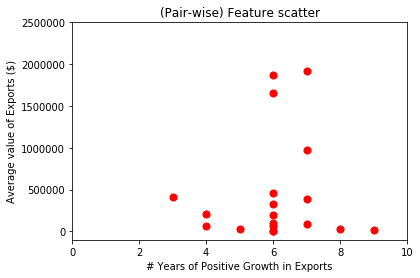

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.scatter ('YrsPositiveGrowth', 'AvgExports', data=df, c='r', marker='o', s=50)
ax.set_xlabel ('# Years of Positive Growth in Exports')
ax.set_ylabel ('Average value of Exports ($)')
ax.set_title ('(Pair-wise) Feature scatter')
ax.set_xlim (0, 10)
ax.set_ylim (-100000, 2500000)

In [8]:

# Step 4b:  Specify the Features to be included in the Cluster Analysis  
features = ['AvgExports', 'MaxExports', 'AvgGrowth', 'YrsPositiveGrowth']
feature_names = ['Avg Exports ($)', 'Max Exports ($)', 'Avg Growth (% YoY)', '# Yrs Positive Growth']
feature_longnames = ['Average value of Exports ($)', 'Max value of Exports ($)', 'Avg Growth in Exports (% YoY)', '# Years of Positive Growth in Exports']

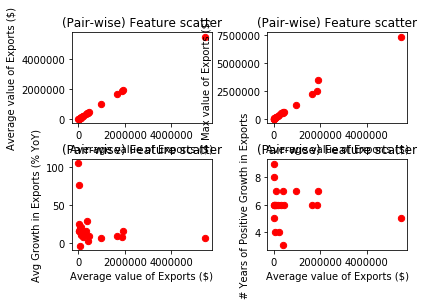

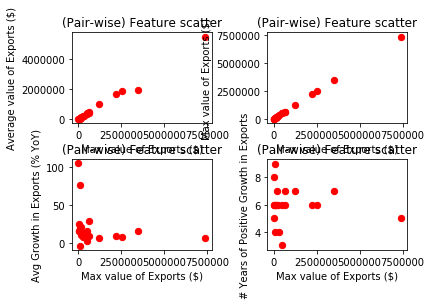

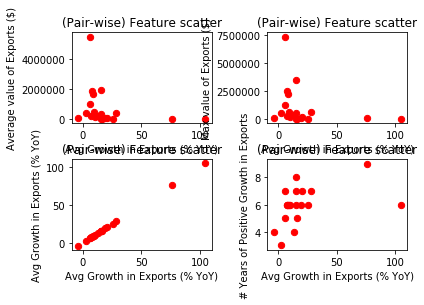

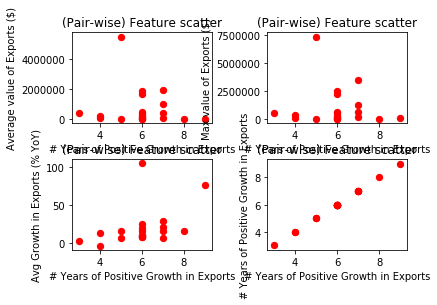

In [13]:

# Step 4c:  Draw Scatter plots for each "pair-wise" combination of the Features  
for i in  range(4):
	fig = plt.figure()
	fig.subplots_adjust (hspace=0.4, wspace=0.4)
	for j in range (4):
		ax = fig.add_subplot (2, 2, j+1)
		ax.scatter (features [i], features [j], data=df, c='r', marker='o', s=40)
		ax.set_xlabel (feature_longnames [i])
		ax.set_ylabel (feature_longnames [j])
		ax.set_title ('(Pair-wise) Feature scatter')

In [15]:
import numpy as np
# Step 5:  For the data subset of 7 nations, prepare the data to be used for building the Cluster Analysis model  
# Step 5a:  Create arrays for the Features  
few_X = np.array (df [features])
# Step 5b:  Calculate the means and the standard deviations for each of the Features  
few_mu = few_X.mean (axis=0)
few_sigma = few_X.std (axis=0)
# Step 5c:  Scale the data to be used for building the Cluster Analysis model  
few_Xs = (few_X - few_mu) / few_sigma
# Step 5d: Display the scaled data for each of the Features  
print ('Standardized Features:')
print (few_Xs)
print ('')

Standardized Features:
[[-0.51528348 -0.52562243 -0.03689752  0.        ]
 [-0.19995377 -0.21969781 -0.43706187  0.        ]
 [-0.26216058 -0.21879204  0.32795137  0.74535599]
 [-0.24022328 -0.29833657 -0.70671882 -2.23606798]
 [-0.49616399 -0.48747309  0.0144573   0.74535599]
 [-0.56743136 -0.58209119  0.20962808  0.        ]
 [-0.30710754 -0.30016874 -0.19476096  0.        ]
 [ 0.20758874  0.11732914 -0.5730188   0.74535599]
 [ 0.75407758  0.68722611 -0.46391994  0.        ]
 [-0.52068554 -0.53670029 -0.9626335  -1.49071198]
 [-0.40211829 -0.40145283 -0.27841935 -1.49071198]
 [-0.49281892 -0.50891619 -0.40060188  0.        ]
 [-0.55367928 -0.53892131  2.23326395  2.23606798]
 [-0.55299341 -0.5648583  -0.18369727  1.49071198]
 [-0.55201404 -0.56879532 -0.15891138 -0.74535599]
 [-0.57102915 -0.58557653  3.38922114  0.        ]
 [-0.41472008 -0.43220181 -0.51747946  0.        ]
 [ 0.96278806  1.42121822 -0.1939337   0.74535599]
 [ 0.92698585  0.88051762 -0.49492238  0.        ]
 [ 3.796

In [16]:

# Step 6:  For the data subset of 7 nations, build the Cluster Analysis model  
# Step 6a:  Determine the Linkage matrix  
few_Z = linkage (few_Xs, 'complete')


Text(0.5, 1.0, '(Hierarchical) Cluster Dendrogram -  linkage=complete')

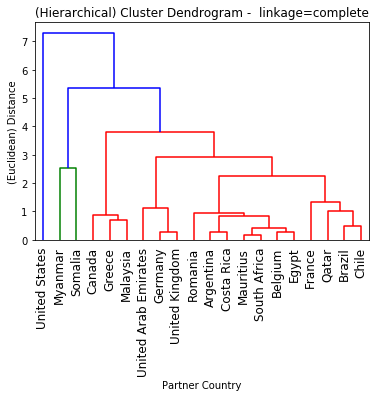

In [19]:

# Step 6b: Visualize the clusters envisaged by the model through a Dendrogram  
few_cluster_labels = np.array ( df['PartnerCountry'])
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
dendrogram (few_Z, labels=few_cluster_labels, leaf_rotation=90)
ax.set_xlabel ('Partner Country')
ax.set_ylabel ('(Euclidean) Distance')
ax.set_title ('(Hierarchical) Cluster Dendrogram -  linkage=complete')


In [24]:

# Step 10: For the complete data of 20 nations, explore the clusters by iterating over the number of clusters  
iter_clusterIDs = ['ClusterID (k=1)', 'ClusterID (k=2)', 'ClusterID (k=3)', 'ClusterID (k=4)', 'ClusterID (k=5)', 'ClusterID (k=6)', 'ClusterID (k=7)', 'ClusterID (k=8)', 'ClusterID (k=9)', 'ClusterID (k=10)', 'ClusterID (k=11)', 'ClusterID (k=12)', 'ClusterID (k=13)', 'ClusterID (k=14)', 'ClusterID (k=15)', 'ClusterID (k=16)', 'ClusterID (k=17)', 'ClusterID (k=18)', 'ClusterID (k=19)', 'ClusterID (k=20)']
for k in range (20):
	df [iter_clusterIDs [k]] = fcluster (few_Z, t=k+1, criterion='maxclust')
df.info()
df.to_csv ("Textiles (Cluster IDs).csv")
fields = np.insert (iter_clusterIDs, 0, 'PartnerCountry')
print ('Assignments of Clusters:')
print (df[fields])
print( '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 27 columns):
PartnerCountry       20 non-null object
PartnerContinent     20 non-null object
DevelopmentStatus    20 non-null object
AvgExports           20 non-null float64
MaxExports           20 non-null float64
AvgGrowth            20 non-null float64
YrsPositiveGrowth    20 non-null int64
ClusterID (k=1)      20 non-null int32
ClusterID (k=2)      20 non-null int32
ClusterID (k=3)      20 non-null int32
ClusterID (k=4)      20 non-null int32
ClusterID (k=5)      20 non-null int32
ClusterID (k=6)      20 non-null int32
ClusterID (k=7)      20 non-null int32
ClusterID (k=8)      20 non-null int32
ClusterID (k=9)      20 non-null int32
ClusterID (k=10)     20 non-null int32
ClusterID (k=11)     20 non-null int32
ClusterID (k=12)     20 non-null int32
ClusterID (k=13)     20 non-null int32
ClusterID (k=14)     20 non-null int32
ClusterID (k=15)     20 non-null int32
ClusterID (k=16)     20 non-nu